In [1]:
import sys  
#sys.executable} -m pip install pandas
import pandas as pd
import numpy as np

#!{sys.executable} -m pip install geopandas
import geopandas as gpd

import requests

import warnings
warnings.filterwarnings('ignore')

#!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

#!{sys.executable} -m pip install folium
import folium
#!{sys.executable} -m pip install geopy

import geopy.distance
import glob

In [2]:
# loading all the county files
file_list = glob.glob('processed_data/selected_*_final.csv')
file_list

['processed_data/selected_nj_bg_data_final.csv',
 'processed_data/selected_LA_bg_data_final.csv',
 'processed_data/selected_HUSTON_bg_data_final.csv',
 'processed_data/selected_ny_bg_data_final.csv']

In [3]:
# selecting only few for testing
f_list_2 = ['processed_data/selected_nj_bg_data_final.csv',
 'processed_data/selected_ny_bg_data_final.csv']

In [4]:
df_list = []
for file in file_list:
    tp_df=pd.read_csv(file)
    df_list.append(tp_df)

In [5]:
# appending loaded dataframes
df=pd.concat(df_list)

In [6]:
df.COUNTY.unique()

array(['Bergen County', 'Essex County', 'Hudson County',
       'Middlesex County', 'Morris County', 'Union County',
       'Los Angeles County', 'Harris County', 'Bronx County',
       'Kings County', 'New York County', 'Queens County',
       'Richmond County'], dtype=object)

In [7]:
df.shape

(1835, 53)

In [46]:
df.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
0  G34000300021001  New Jersey      34  Bergen County        3    2100   
1  G34000300021002  New Jersey      34  Bergen County        3    2100   
2  G34000300022001  New Jersey      34  Bergen County        3    2200   
3  G34000300023002  New Jersey      34  Bergen County        3    2300   
4  G34000300031001  New Jersey      34  Bergen County        3    3100   

   BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
0          1                  119                        127   
1          2                   84                         73   
2          1                  372                        260   
3          2                  226                         84   
4          1                  274                        188   

   travel_time_>60_mins  ...  Rail Station_count  Bus Stop_avg_distance  \
0                    58  ...                 0.0                    0.0   
1                    70  ...                 0.0                    0.0   
2                   216  ...                 0.0                    0.0   
3                   194  ...                 0.0                    0.0   
4                    75  ...                 0.0                 1532.4   

   Metro Station_avg_distance  Public Transportation_avg_distance  \
0                         0.0                              1511.0   
1                         0.0                                 0.0   
2                         0.0                              1866.0   
3                         0.0                              1484.0   
4                         0.0                              1633.0   

   Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
0                        0.0                   2.0                    804   
1                        0.0                   2.0                    655   
2                        0.0                  10.0                   1708   
3                        0.0                   8.0                   1597   
4                        0.0                  16.0                   1117   

   White alone  Asian alone  Indo-Chinese Restaurants Count  
0          523          243                             0.0  
1          370          230                             0.0  
2          925          760                             4.0  
3          779          768                             1.0  
4          766          329                            16.0  

[5 rows x 57 columns]

### Merging Race Data

In [8]:
# adding the race information
df_race=pd.read_csv('processed_data/selected_states_race_data.csv')

In [9]:
df_race.shape

(98220, 4)

In [10]:
df=df.merge(df_race,on='GISJOIN',how='left')

In [11]:
df.shape

(1835, 56)

In [12]:
cords=df[['lat','lon']].values.tolist()

In [13]:
df.STATE.unique()

array(['New Jersey', 'California', 'Texas', 'New York'], dtype=object)

In [14]:
m = folium.Map(location=cords[0],zoom_control=3)

for point in cords:
    folium.Circle(
        radius=10,
        location=point,
        popup=str(point),#"The Waterfront",
        color="crimson",
        fill=False,).add_to(m)


m

### Analysing per County

In [15]:
res_analysis_cols =['Total_Population', 'Total_Working','Worked from home','Chinese Restaurant_count', 'Indian Restaurant_count', 'Italian Restaurant_count','Mexican Restaurant_count']


In [16]:
df.rename(columns={'income_group_<$10k':'income_group_<10k',
       'income_group_$10k_to_$25k':'income_group_10k_to_25k',
    'income_group_$25k_to_$50k':  'income_group_25k_to_50k',
       'income_group_$50k_to_$100k':'income_group_50k_to_100k',
    'income_group_$100k_to_$200k':'income_group_100k_to_200k',
                         'income_group_>$200k':'income_group_>200k'
},inplace=True)

In [17]:
income_groups= ['income_group_<10k',
       'income_group_10k_to_25k', 'income_group_25k_to_50k',
       'income_group_50k_to_100k', 'income_group_100k_to_200k',
       'income_group_>200k']

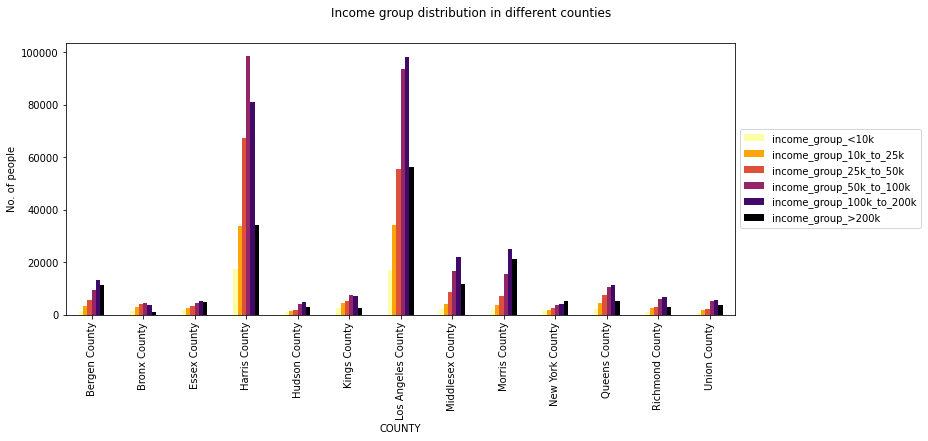

In [18]:
#  TODO : changes the inferno range
ax=df.groupby(['COUNTY'])[income_groups].sum().plot(kind='bar',figsize=(15,5),cmap='inferno_r')#.unstack(-1)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Income group distribution in different counties')
plt.ylabel('No. of people')
plt.show()

In [19]:
p1 = df.groupby(['COUNTY'])[res_analysis_cols].sum()

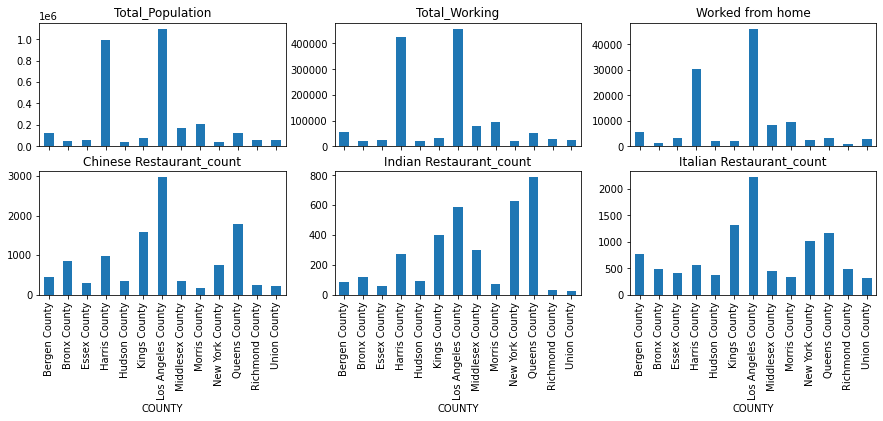

In [20]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,5),sharex=True)
cols=p1.columns.tolist()
k=0
for i in range(2):
    for j in range(3):
        p1[cols[k]].plot(kind='bar',ax=axes[i][j])
        axes[i][j].set_title(cols[k])
        k=k+1
plt.show()

In [21]:
df.shape

(1835, 56)

In [22]:
df.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
0  G34000300021001  New Jersey      34  Bergen County        3    2100   
1  G34000300021002  New Jersey      34  Bergen County        3    2100   
2  G34000300022001  New Jersey      34  Bergen County        3    2200   
3  G34000300023002  New Jersey      34  Bergen County        3    2300   
4  G34000300031001  New Jersey      34  Bergen County        3    3100   

   BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
0          1                  119                        127   
1          2                   84                         73   
2          1                  372                        260   
3          2                  226                         84   
4          1                  274                        188   

   travel_time_>60_mins  ...  Public Transportation_count  Rail Station_count  \
0                    58  ...                          1.0                 NaN   
1                    70  ...                          NaN                 NaN   
2                   216  ...                          1.0                 NaN   
3                   194  ...                          1.0                 NaN   
4                    75  ...                          1.0                 NaN   

   Bus Stop_avg_distance  Metro Station_avg_distance  \
0                    NaN                         NaN   
1                    NaN                         NaN   
2                    NaN                         NaN   
3                    NaN                         NaN   
4                 1532.4                         NaN   

   Public Transportation_avg_distance  Rail Station_avg_distance  \
0                              1511.0                        NaN   
1                                 NaN                        NaN   
2                              1866.0                        NaN   
3                              1484.0                        NaN   
4                              1633.0                        NaN   

   Business_Parks_Count  Total_Population_Race  White alone  Asian alone  
0                   2.0                    804          523          243  
1                   2.0                    655          370          230  
2                  10.0                   1708          925          760  
3                   8.0                   1597          779          768  
4                  16.0                   1117          766          329  

[5 rows x 56 columns]

In [23]:
df = df.fillna(0)

In [24]:
df.isna().sum().sum()

0

In [25]:
df['Indo-Chinese Restaurants Count'] = df['Chinese Restaurant_count'] + df['Indian Restaurant_count']

In [26]:
debug_cols =  ['GISJOIN', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA','BLCK_GRPA','INTPTLAT','INTPTLON', 'geometry', 'lat', 'lon']

time_for_travel_cols = ['travel_time_<30mins', 'travel_time_30_to_60_mins','travel_time_>60_mins']
income_group_cols = ['income_group_<10k', 'income_group_10k_to_25k','income_group_25k_to_50k', 'income_group_50k_to_100k','income_group_100k_to_200k', 'income_group_>200k']
total_population_col = ['Total_Population', 'White alone', 'Asian alone']
mode_of_commute_col = ['Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home']
work_force_cols =[
       'In labor force', 'In labor force: Civilian labor force',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'In labor force: Armed Forces', 'Not in labor force']

restaurent_cols = [ 'Chinese Restaurant_count',
       'Indian Restaurant_count', 'Italian Restaurant_count',
       'Mexican Restaurant_count', 'Chinese Restaurant_avg_distance',
       'Indian Restaurant_avg_distance', 'Italian Restaurant_avg_distance',
       'Mexican Restaurant_avg_distance']
transport_fs_cols =[ 'Bus Stop_count',
       'Metro Station_count', 'Public Transportation_count',
       'Rail Station_count', 'Bus Stop_avg_distance',
       'Metro Station_avg_distance', 'Public Transportation_avg_distance',
       'Rail Station_avg_distance']
business_park_cols =['Business_Parks_Count']
selected_cols = total_population_col + time_for_travel_cols+income_group_cols+mode_of_commute_col+work_force_cols+transport_fs_cols

selected_cols = total_population_col #+ income_group_cols+mode_of_commute_col+work_force_cols+transport_fs_cols

target=['Indo-Chinese Restaurants Count']


model_cols =selected_cols+target



In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans


In [29]:
df.COUNTY.unique()

array(['Bergen County', 'Essex County', 'Hudson County',
       'Middlesex County', 'Morris County', 'Union County',
       'Los Angeles County', 'Harris County', 'Bronx County',
       'Kings County', 'New York County', 'Queens County',
       'Richmond County'], dtype=object)

In [33]:
df.groupby(['STATE','COUNTY'],as_index=False).size().drop(['size'],axis=1)

STATE              COUNTY
0   California  Los Angeles County
1   New Jersey       Bergen County
2   New Jersey        Essex County
3   New Jersey       Hudson County
4   New Jersey    Middlesex County
5   New Jersey       Morris County
6   New Jersey        Union County
7     New York        Bronx County
8     New York        Kings County
9     New York     New York County
10    New York       Queens County
11    New York     Richmond County
12       Texas       Harris County

#### Selecting only New York and New Jersey

In [47]:
df_model.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
0  G34000300021001  New Jersey      34  Bergen County        3    2100   
1  G34000300021002  New Jersey      34  Bergen County        3    2100   
2  G34000300022001  New Jersey      34  Bergen County        3    2200   
3  G34000300023002  New Jersey      34  Bergen County        3    2300   
4  G34000300031001  New Jersey      34  Bergen County        3    3100   

   BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
0          1                  119                        127   
1          2                   84                         73   
2          1                  372                        260   
3          2                  226                         84   
4          1                  274                        188   

   travel_time_>60_mins  ...  Rail Station_count  Bus Stop_avg_distance  \
0                    58  ...                 0.0                    0.0   
1                    70  ...                 0.0                    0.0   
2                   216  ...                 0.0                    0.0   
3                   194  ...                 0.0                    0.0   
4                    75  ...                 0.0                 1532.4   

   Metro Station_avg_distance  Public Transportation_avg_distance  \
0                         0.0                              1511.0   
1                         0.0                                 0.0   
2                         0.0                              1866.0   
3                         0.0                              1484.0   
4                         0.0                              1633.0   

   Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
0                        0.0                   2.0                    804   
1                        0.0                   2.0                    655   
2                        0.0                  10.0                   1708   
3                        0.0                   8.0                   1597   
4                        0.0                  16.0                   1117   

   White alone  Asian alone  Indo-Chinese Restaurants Count  
0          523          243                             0.0  
1          370          230                             0.0  
2          925          760                             4.0  
3          779          768                             1.0  
4          766          329                            16.0  

[5 rows x 57 columns]

In [38]:
df_model = df[df.STATE.isin(['New York','New Jersey'])].copy()#[df.COUNTY=='Kings County'].copy()

In [39]:
df_model.groupby(['STATE','COUNTY'],as_index=False).size().drop(['size'],axis=1)

STATE            COUNTY
0   New Jersey     Bergen County
1   New Jersey      Essex County
2   New Jersey     Hudson County
3   New Jersey  Middlesex County
4   New Jersey     Morris County
5   New Jersey      Union County
6     New York      Bronx County
7     New York      Kings County
8     New York   New York County
9     New York     Queens County
10    New York   Richmond County

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(df_model[model_cols])

In [41]:
X.shape

(680, 4)

In [42]:
aug_indices = np.random.randint(X.shape[0], size=100000)

In [43]:
X_aug = X[aug_indices]

In [44]:
X_final = np.vstack([X,X_aug])

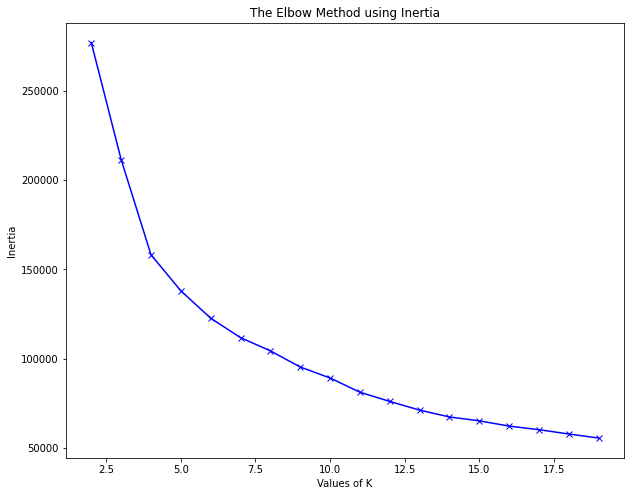

In [45]:
# find 'k' value by Elbow Method
plt.figure(figsize=[10, 8])
inertia=[]
range_val=range(2,20)
for i in range_val:
    kmean=KMeans(n_clusters=i)
    kmean.fit_predict(X_final)
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [50]:
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)
#kmeans = DBSCAN(min_samples=5,eps=0.25).fit(X)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 2, 1, 1, 1, 3, 1, 1], dtype=int32)

In [51]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [52]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

In [53]:
kmeans.labels_.shape

(680,)

In [54]:
df_model['cluster']  = kmeans.labels_

In [55]:
lat=df_model['lat']
lon=df_model['lon']
geoid=df_model['GISJOIN']
cluster = df_model['cluster']

In [56]:
map_clusters = folium.Map(location=cords[0], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lat,lon,geoid,cluster):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

<AxesSubplot:>

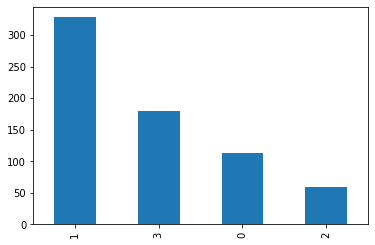

In [58]:
df_model.cluster.value_counts().plot(kind='bar')

In [59]:
df_model.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
0  G34000300021001  New Jersey      34  Bergen County        3    2100   
1  G34000300021002  New Jersey      34  Bergen County        3    2100   
2  G34000300022001  New Jersey      34  Bergen County        3    2200   
3  G34000300023002  New Jersey      34  Bergen County        3    2300   
4  G34000300031001  New Jersey      34  Bergen County        3    3100   

   BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
0          1                  119                        127   
1          2                   84                         73   
2          1                  372                        260   
3          2                  226                         84   
4          1                  274                        188   

   travel_time_>60_mins  ...  Bus Stop_avg_distance  \
0                    58  ...                    0.0   
1                    70  ...                    0.0   
2                   216  ...                    0.0   
3                   194  ...                    0.0   
4                    75  ...                 1532.4   

   Metro Station_avg_distance  Public Transportation_avg_distance  \
0                         0.0                              1511.0   
1                         0.0                                 0.0   
2                         0.0                              1866.0   
3                         0.0                              1484.0   
4                         0.0                              1633.0   

   Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
0                        0.0                   2.0                    804   
1                        0.0                   2.0                    655   
2                        0.0                  10.0                   1708   
3                        0.0                   8.0                   1597   
4                        0.0                  16.0                   1117   

   White alone  Asian alone  Indo-Chinese Restaurants Count  cluster  
0          523          243                             0.0        1  
1          370          230                             0.0        1  
2          925          760                             4.0        2  
3          779          768                             1.0        2  
4          766          329                            16.0        1  

[5 rows x 58 columns]

In [60]:
target

['Indo-Chinese Restaurants Count']

In [61]:
df.columns

Index(['GISJOIN', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA',
       'BLCK_GRPA', 'travel_time_<30mins', 'travel_time_30_to_60_mins',
       'travel_time_>60_mins', 'income_group_<10k', 'income_group_10k_to_25k',
       'income_group_25k_to_50k', 'income_group_50k_to_100k',
       'income_group_100k_to_200k', 'income_group_>200k', 'Total_Population',
       'Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home',
       'In labor force', 'In labor force: Civilian labor force',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'In labor force: Armed Forces', 'Not in labor force', 'INTPTLAT',
       'INTPTLON', 'geometry', 'lat', 'lon', 'Chinese Restaurant_count',
       'Indian Restaurant_count', 'Italian Restaurant_count',
       'Mexican Restaurant_count', 'Chinese Restaurant_avg_distance',
       'Indian Restaurant_avg_dista

In [62]:
d1 = df_model.groupby(['cluster']).agg({'GISJOIN':'count','Total_Population':'sum','Asian alone':'sum','Indo-Chinese Restaurants Count':'sum'})



In [63]:
d1['avg']=d1['Indo-Chinese Restaurants Count']*100/d1['Total_Population']
d1['avg_per_asian']=d1['Indo-Chinese Restaurants Count']*100/d1['Asian alone']

In [64]:
d1

GISJOIN  Total_Population  Asian alone  \
cluster                                           
0            113            147344        19423   
1            328            363926        40642   
2             59            118002        58418   
3            180            379908        33524   

         Indo-Chinese Restaurants Count       avg  avg_per_asian  
cluster                                                           
0                                5412.0  3.673037      27.863873  
1                                2527.0  0.694372       6.217706  
2                                 799.0  0.677107       1.367729  
3                                 859.0  0.226107       2.562343

In [65]:
cmap='inferno_r'

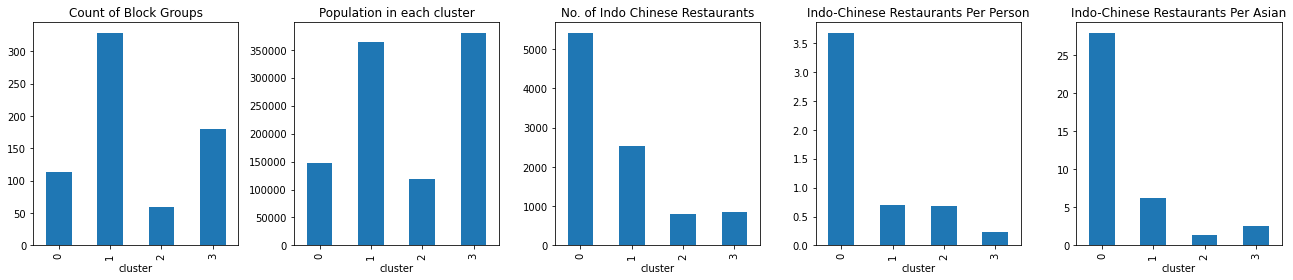

In [66]:
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(18,4))
d1['GISJOIN'].plot(kind='bar',ax=axes[0])
axes[0].set_title('Count of Block Groups')
d1['Total_Population'].plot(kind='bar',ax=axes[1])
axes[1].set_title('Population in each cluster')
d1['Indo-Chinese Restaurants Count'].plot(kind='bar',ax=axes[2])
axes[2].set_title('No. of Indo Chinese Restaurants')
d1['avg'].plot(kind='bar',ax=axes[3])
axes[3].set_title('Indo-Chinese Restaurants Per Person')
d1['avg_per_asian'].plot(kind='bar',ax=axes[4])
axes[4].set_title('Indo-Chinese Restaurants Per Asian')
plt.tight_layout()
plt.show()

In [67]:
df_model.shape

(680, 58)

In [69]:
#select the cluster
df_model[df_model.cluster==2]

GISJOIN       STATE  STATEA            COUNTY  COUNTYA  TRACTA  \
2     G34000300022001  New Jersey      34     Bergen County        3    2200   
3     G34000300023002  New Jersey      34     Bergen County        3    2300   
11    G34000300070011  New Jersey      34     Bergen County        3    7001   
19    G34000300130024  New Jersey      34     Bergen County        3   13002   
24    G34000300154021  New Jersey      34     Bergen County        3   15402   
44    G34000300280012  New Jersey      34     Bergen County        3   28001   
125   G34001300206005  New Jersey      34      Essex County       13   20600   
138   G34001700009022  New Jersey      34     Hudson County       17     902   
142   G34001700054003  New Jersey      34     Hudson County       17    5400   
155   G34001700158012  New Jersey      34     Hudson County       17   15801   
159   G34001700201001  New Jersey      34     Hudson County       17   20100   
163   G34002300004031  New Jersey      34  Middlesex County       23     403   
167   G34002300006091  New Jersey      34  Middlesex County       23     609   
173   G34002300010042  New Jersey      34  Middlesex County       23    1004   
176   G34002300014111  New Jersey      34  Middlesex County       23    1411   
177   G34002300014142  New Jersey      34  Middlesex County       23    1414   
178   G34002300014151  New Jersey      34  Middlesex County       23    1415   
186   G34002300019011  New Jersey      34  Middlesex County       23    1901   
194   G34002300030021  New Jersey      34  Middlesex County       23    3002   
206   G34002300062041  New Jersey      34  Middlesex County       23    6204   
209   G34002300062082  New Jersey      34  Middlesex County       23    6208   
216   G34002300066041  New Jersey      34  Middlesex County       23    6604   
223   G34002300072022  New Jersey      34  Middlesex County       23    7202   
240   G34002300079132  New Jersey      34  Middlesex County       23    7913   
253   G34002300082144  New Jersey      34  Middlesex County       23    8214   
254   G34002300084031  New Jersey      34  Middlesex County       23    8403   
255   G34002300084034  New Jersey      34  Middlesex County       23    8403   
256   G34002300084051  New Jersey      34  Middlesex County       23    8405   
257   G34002300085012  New Jersey      34  Middlesex County       23    8501   
259   G34002300085022  New Jersey      34  Middlesex County       23    8502   
260   G34002300085023  New Jersey      34  Middlesex County       23    8502   
262   G34002300085041  New Jersey      34  Middlesex County       23    8504   
263   G34002300085042  New Jersey      34  Middlesex County       23    8504   
264   G34002300085053  New Jersey      34  Middlesex County       23    8505   
265   G34002300086011  New Jersey      34  Middlesex County       23    8601   
267   G34002300086023  New Jersey      34  Middlesex County       23    8602   
268   G34002300086044  New Jersey      34  Middlesex County       23    8604   
287   G34002700408031  New Jersey      34     Morris County       27   40803   
300   G34002700416031  New Jersey      34     Morris County       27   41603   
301   G34002700416032  New Jersey      34     Morris County       27   41603   
303   G34002700416053  New Jersey      34     Morris County       27   41605   
304   G34002700417051  New Jersey      34     Morris County       27   41705   
382   G34002700461102  New Jersey      34     Morris County       27   46110   
1635  G36004700094022    New York      36      Kings County       47    9402   
1643  G36004700228001    New York      36      Kings County       47   22800   
1698  G36006100145001    New York      36   New York County       61   14500   
1713  G36008100019021    New York      36     Queens County       81    1902   
1746  G36008100475001    New York      36     Queens County       81   47500   
1763  G36008100797011    New York      36     Queens County       81   79701   
1764  G3600810

In [70]:
selected_cluster_points = df_model[df_model.cluster==2][['lat','lon']].values.tolist()

In [71]:
m = folium.Map(location=selected_cluster_points[0])

for point in selected_cluster_points:
    folium.Circle(
        radius=100,
        location=point,
        popup=str(point),#"The Waterfront",
        color="crimson",
        fill=False,).add_to(m)

    folium.CircleMarker(
        location=point,
        radius=10,
        popup=str(point),#"Laurelhurst Park",
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",).add_to(m)


m

In [237]:
df_model.head()

GISJOIN     STATE  STATEA        COUNTY  COUNTYA  TRACTA  \
473  G36004700002001  New York      36  Kings County       47     200   
474  G36004700022003  New York      36  Kings County       47    2200   
475  G36004700029012  New York      36  Kings County       47    2901   
476  G36004700044001  New York      36  Kings County       47    4400   
477  G36004700045003  New York      36  Kings County       47    4500   

     BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
473          1                  148                        283   
474          3                   61                        292   
475          2                  103                        143   
476          1                  261                        169   
477          3                  144                        246   

     travel_time_>60_mins  ...  Bus Stop_avg_distance  \
473                    78  ...            1126.750000   
474                   104  ...            1270.571429   
475                    63  ...            1259.800000   
476                   157  ...            1342.300000   
477                    13  ...             998.909091   

     Metro Station_avg_distance  Public Transportation_avg_distance  \
473                 1384.875000                          602.000000   
474                  991.500000                         1215.500000   
475                 1443.888889                         1150.478261   
476                 1354.000000                         1417.500000   
477                 1422.222222                         1163.666667   

     Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
473                 974.000000                  68.0                    992   
474                 859.600000                  63.0                    940   
475                1391.230769                 182.0                   1045   
476                1636.000000                  25.0                   1301   
477                1197.400000                 171.0                    747   

     White alone  Asian alone  Indo-Chinese Restaurants Count  cluster  
473          446           46                            29.0        2  
474          535          103                            33.0        2  
475          148           25                            62.0        5  
476         1200           81                            23.0        1  
477          535          103                            54.0        5  

[5 rows x 58 columns]

In [72]:
four_square_cols = restaurent_cols + transport_fs_cols + business_park_cols 

In [73]:
df_result = df_model[['GISJOIN']+total_population_col+income_group_cols+four_square_cols+target][df_model.cluster==0]

In [74]:
df_result.head()

GISJOIN  Total_Population  White alone  Asian alone  \
90   G34001300010001              1305          152           60   
139  G34001700023002              1370          553          409   
153  G34001700145012              1518          686           75   
157  G34001700183012              1316          857          421   
175  G34002300014091               804          336          418   

     income_group_<10k  income_group_10k_to_25k  income_group_25k_to_50k  \
90                 220                       71                      168   
139                  8                        0                       18   
153                231                      159                       70   
157                  0                       27                        0   
175                  0                        0                        0   

     income_group_50k_to_100k  income_group_100k_to_200k  income_group_>200k  \
90                         55                          7                   0   
139                       182                        219                 197   
153                       171                         79                   0   
157                        76                        176                 364   
175                        63                        114                  79   

     ...  Bus Stop_count  Metro Station_count  Public Transportation_count  \
90   ...            12.0                  1.0                          8.0   
139  ...             6.0                  3.0                         11.0   
153  ...             4.0                  0.0                         10.0   
157  ...            27.0                  3.0                         12.0   
175  ...             0.0                  0.0                          0.0   

     Rail Station_count  Bus Stop_avg_distance  Metro Station_avg_distance  \
90                 15.0            1320.416667                 1795.000000   
139                11.0            1219.666667                 1149.333333   
153                 6.0            1474.000000                    0.000000   
157                16.0            1549.962963                 1129.000000   
175                 0.0               0.000000                    0.000000   

     Public Transportation_avg_distance  Rail Station_avg_distance  \
90                          1477.875000                1079.333333   
139                         1315.727273                1284.636364   
153                         1106.700000                1217.666667   
157                          955.833333                 820.937500   
175                            0.000000                   0.000000   

     Business_Parks_Count  Indo-Chinese Restaurants Count  
90                  105.0                            32.0  
139                 175.0                            52.0  
153                  39.0                            32.0  
157                 148.0                            31.0  
175                  17.0                            38.0  

[5 rows x 28 columns]

In [75]:
df_result['restaurant_per_person']=df_result['Indo-Chinese Restaurants Count']/df_result['Total_Population']
df_result['restaurant_per_asian']=df_result['Indo-Chinese Restaurants Count']/df_result['Asian alone']

In [76]:
mode_of_commute_col = ['Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home']

In [77]:
df_result = df_result.merge(df_model[debug_cols+mode_of_commute_col],on='GISJOIN',how='left')

In [78]:
df_result['identifier']=df_result['COUNTY']+'_T'+df_result['TRACTA'].apply(str)+'_BG'+df_result['BLCK_GRPA'].apply(str)



In [79]:
import seaborn

In [80]:
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

In [81]:
df_result.columns

Index(['GISJOIN', 'Total_Population', 'White alone', 'Asian alone',
       'income_group_<10k', 'income_group_10k_to_25k',
       'income_group_25k_to_50k', 'income_group_50k_to_100k',
       'income_group_100k_to_200k', 'income_group_>200k',
       'Chinese Restaurant_count', 'Indian Restaurant_count',
       'Italian Restaurant_count', 'Mexican Restaurant_count',
       'Chinese Restaurant_avg_distance', 'Indian Restaurant_avg_distance',
       'Italian Restaurant_avg_distance', 'Mexican Restaurant_avg_distance',
       'Bus Stop_count', 'Metro Station_count', 'Public Transportation_count',
       'Rail Station_count', 'Bus Stop_avg_distance',
       'Metro Station_avg_distance', 'Public Transportation_avg_distance',
       'Rail Station_avg_distance', 'Business_Parks_Count',
       'Indo-Chinese Restaurants Count', 'restaurant_per_person',
       'restaurant_per_asian', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA',
       'TRACTA', 'BLCK_GRPA', 'INTPTLAT', 'INTPTLON', 'geometry', 'lat', '

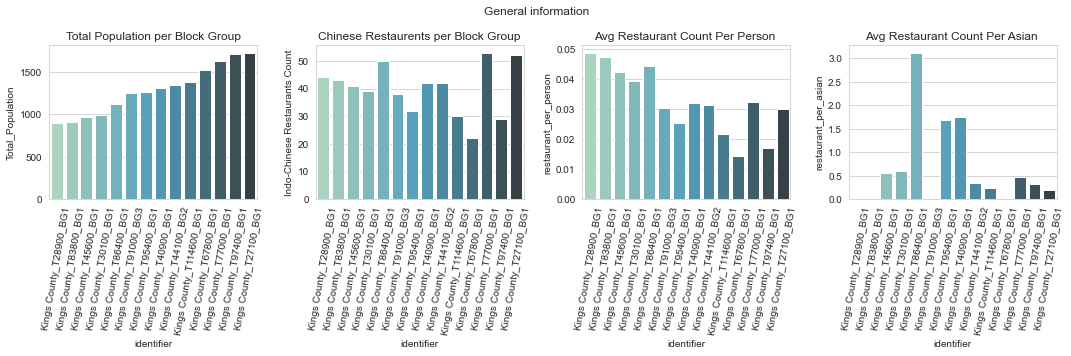

In [265]:
fig,axes= plt.subplots(nrows=1,ncols=4,figsize=(15,5))
sns.barplot(x='identifier',y='Total_Population',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[0])
sns.barplot(x='identifier',y='Indo-Chinese Restaurants Count',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[1])
sns.barplot(x='identifier',y='restaurant_per_person',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[2])
sns.barplot(x='identifier',y='restaurant_per_asian',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[3])

#axes[0].set_xlabel('Total_Population')
#axes[1].set_xlabel('Chinese Restaurant_count')
#axes[2].set_xlabel('Avg Restaurant Count Per Person ')
axes[0].set_title('Total Population per Block Group')
axes[1].set_title('Chinese Restaurents per Block Group')
axes[2].set_title('Avg Restaurant Count Per Person ')
axes[3].set_title('Avg Restaurant Count Per Asian ')
axes[0].tick_params(axis='x', rotation=80)
axes[1].tick_params(axis='x', rotation=80)
axes[2].tick_params(axis='x', rotation=80)
axes[3].tick_params(axis='x', rotation=80)
plt.suptitle('General information')
plt.tight_layout()
plt.show()

In [266]:
#fig,axes= plt.subplots(nrows=2,ncols=4,figsize=(15,8),sharex=True)
#k=0
#for i in range(2):
#    for j in range(4):
#        sns.barplot(x='identifier',y=transport_fs_cols[k],data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[i][j])
#        axes[i][j].set_title(transport_fs_cols[k])
#        axes[i][j].tick_params(axis='x', rotation=80)
#        k=k+1
#plt.suptitle('Transport Information per Block Group')
#plt.tight_layout()
#plt.show()    

In [269]:
mode_of_commute_col2 = [i.replace(',','').replace(' ','_') for i in mode_of_commute_col]
md={i:j for i,j in zip(mode_of_commute_col,mode_of_commute_col2)}
df_result = df_result.rename(columns=md)
mode_of_commute_col2

['Total_Working',
 'Car_truck_or_van',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other_means_of_transport',
 'Worked_from_home']

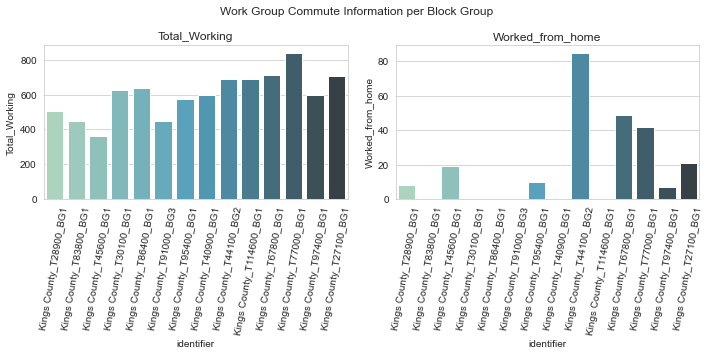

In [273]:
fig,axes= plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharex=True)
sns.barplot(x='identifier',y='Total_Working',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[0])
sns.barplot(x='identifier',y='Worked_from_home',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[1])

axes[0].set_title('Total_Working')
axes[1].set_title('Worked_from_home')
axes[0].tick_params(axis='x', rotation=80)
axes[1].tick_params(axis='x', rotation=80)
plt.suptitle('Work Group Commute Information per Block Group')
plt.tight_layout()
plt.show()    

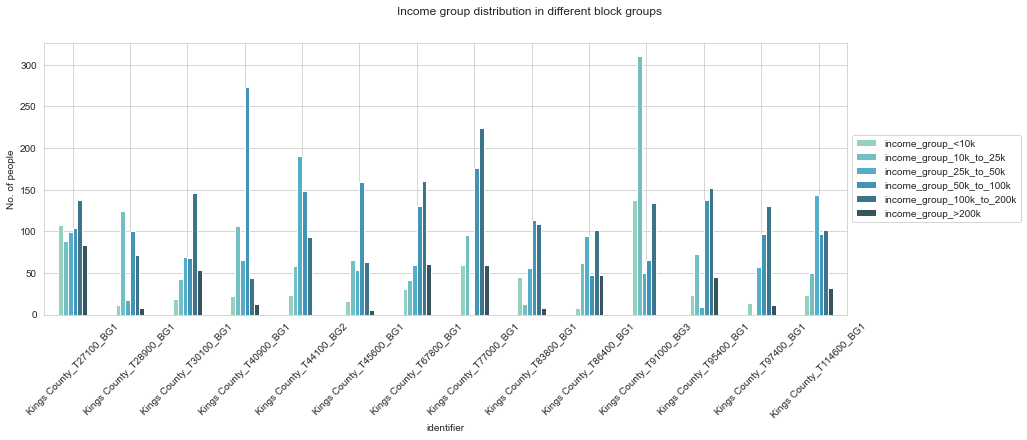

In [274]:
ax = df_result[['identifier']+income_group_cols].set_index('identifier').plot(kind='bar',figsize=(18,5))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Income group distribution in different block groups')
plt.ylabel('No. of people')
plt.xticks(rotation=45)
plt.show()

### Scoring the Block Groups

In [ ]:
A - 1000
C - 400

40/1000
40/400 = 0.1
30/400 = 0.2

In [82]:
score_df = df_result[['identifier','restaurant_per_person','restaurant_per_asian','Total_Working','income_group_100k_to_200k']]
score_df['restaurant_per_asian'] = score_df['restaurant_per_asian'].replace(np.inf,0)#*100
scale_cols=score_df.columns[1:]
score_df

identifier  restaurant_per_person  restaurant_per_asian  \
0        Essex County_T1000_BG1               0.024521              0.533333   
1       Hudson County_T2300_BG2               0.037956              0.127139   
2      Hudson County_T14501_BG2               0.021080              0.426667   
3      Hudson County_T18301_BG2               0.023556              0.073634   
4    Middlesex County_T1409_BG1               0.047264              0.090909   
..                          ...                    ...                   ...   
108    Queens County_T83800_BG2               0.039707              0.103825   
109   Queens County_T113300_BG2               0.037736              0.101266   
110   Queens County_T115500_BG2               0.036446              0.124031   
111   Queens County_T119500_BG1               0.036015              0.111905   
112   Queens County_T157101_BG8               0.057728              0.105802   

     Total_Working  income_group_100k_to_200k  
0              531                          7  
1              776                        219  
2              544                         79  
3              867                        176  
4              319                        114  
..             ...                        ...  
108            467                         47  
109            376                        122  
110            442                          5  
111            633                        104  
112            282                        107  

[113 rows x 5 columns]

In [83]:
score_normal=score_df.copy()

In [84]:
def scaleColumn(data):
    '''
    normalizing the columns for scoring
    '''
    row_list = data.values.tolist()
    row_min,row_max = min(row_list),max(row_list)
    op=[]
    for i,val in enumerate(row_list):
        op.append((val-row_min)/(row_max-row_min))
    return op

def getScore(data,weights):
    '''
    scoring the rows with weights
    '''
    score = 0
    for key,value in weights.items():
        score = score + data[key]*value
    return score

In [85]:
# normalizing the columns
for col in scale_cols:
    print(col)
    score_df[col]=scaleColumn(score_df[col])

restaurant_per_person
restaurant_per_asian
Total_Working
income_group_100k_to_200k


In [88]:
score_df.head()

identifier  restaurant_per_person  restaurant_per_asian  \
0      Essex County_T1000_BG1               0.135063              0.087432   
1     Hudson County_T2300_BG2               0.249976              0.020843   
2    Hudson County_T14501_BG2               0.105634              0.069945   
3    Hudson County_T18301_BG2               0.126810              0.012071   
4  Middlesex County_T1409_BG1               0.329585              0.014903   

   Total_Working  income_group_100k_to_200k  
0       0.336198                   0.019231  
1       0.599356                   0.601648  
2       0.350161                   0.217033  
3       0.697100                   0.483516  
4       0.108485                   0.313187

In [89]:
# reversing the numbers as we need restaurent locations with lower PerPerson restaurant
score_df['restaurant_per_person']=1-score_df['restaurant_per_person']
score_df['restaurant_per_asian']=1-score_df['restaurant_per_asian']

In [90]:

w_dict= {'restaurant_per_asian': 50,
 'restaurant_per_person': 20,
 'Total_Working': 10,
 'income_group_100k_to_200k': 20}
w_dict


{'restaurant_per_asian': 50,
 'restaurant_per_person': 20,
 'Total_Working': 10,
 'income_group_100k_to_200k': 20}

In [92]:
score_df

identifier  restaurant_per_person  restaurant_per_asian  \
0        Essex County_T1000_BG1               0.864937              0.912568   
1       Hudson County_T2300_BG2               0.750024              0.979157   
2      Hudson County_T14501_BG2               0.894366              0.930055   
3      Hudson County_T18301_BG2               0.873190              0.987929   
4    Middlesex County_T1409_BG1               0.670415              0.985097   
..                          ...                    ...                   ...   
108    Queens County_T83800_BG2               0.735045              0.982979   
109   Queens County_T113300_BG2               0.751908              0.983399   
110   Queens County_T115500_BG2               0.762937              0.979667   
111   Queens County_T119500_BG1               0.766624              0.981655   
112   Queens County_T157101_BG8               0.580911              0.982655   

     Total_Working  income_group_100k_to_200k      score  
0         0.336198                   0.019231  66.673750  
1         0.599356                   0.601648  81.984871  
2         0.350161                   0.217033  72.232326  
3         0.697100                   0.483516  83.501562  
4         0.108485                   0.313187  70.011735  
..             ...                        ...        ...  
108       0.267454                   0.129121  69.106840  
109       0.169710                   0.335165  72.608518  
110       0.240602                   0.013736  66.922829  
111       0.445757                   0.285714  74.587095  
112       0.068743                   0.293956  67.317535  

[113 rows x 6 columns]

In [91]:
score_df['score']=score_df.apply(getScore,weights=w_dict,axis=1)

In [93]:
score_normal['score']=score_df['score']

In [94]:
score_df.head()

identifier  restaurant_per_person  restaurant_per_asian  \
0      Essex County_T1000_BG1               0.864937              0.912568   
1     Hudson County_T2300_BG2               0.750024              0.979157   
2    Hudson County_T14501_BG2               0.894366              0.930055   
3    Hudson County_T18301_BG2               0.873190              0.987929   
4  Middlesex County_T1409_BG1               0.670415              0.985097   

   Total_Working  income_group_100k_to_200k      score  
0       0.336198                   0.019231  66.673750  
1       0.599356                   0.601648  81.984871  
2       0.350161                   0.217033  72.232326  
3       0.697100                   0.483516  83.501562  
4       0.108485                   0.313187  70.011735

In [95]:
score_normal = score_normal.sort_values(by='score',ascending=False)

In [96]:
score_normal[score_normal.restaurant_per_asian!=0]

identifier  restaurant_per_person  restaurant_per_asian  \
74  New York County_T18500_BG2               0.022514              0.146341   
66   New York County_T7500_BG1               0.036831              0.582418   
95    Queens County_T24000_BG2               0.030303              0.087786   
3     Hudson County_T18301_BG2               0.023556              0.073634   
1      Hudson County_T2300_BG2               0.037956              0.127139   
..                         ...                    ...                   ...   
27      Kings County_T2901_BG2               0.059330              2.480000   
50     Kings County_T51300_BG4               0.064649              3.357143   
69  New York County_T12200_BG1               0.125645              3.476190   
75  New York County_T20000_BG1               0.045968              6.100000   
16     Bronx County_T16500_BG1               0.039883              5.857143   

    Total_Working  income_group_100k_to_200k      score  
74           1149                        249  90.123867  
66            607                        364  84.597322  
95           1026                        174  83.829377  
3             867                        176  83.501562  
1             776                        219  81.984871  
..            ...                        ...        ...  
27            309                         56  45.070660  
50            308                         68  37.619657  
69            227                         64  25.119789  
75            628                         96  23.308477  
16            376                         15  19.182731  

[97 rows x 6 columns]

In [500]:
score_df.sort_values(by='score',ascending=False)

identifier  restaurant_per_person  restaurant_per_asian  \
6    Kings County_T67800_BG1               1.000000              1.000000   
7    Kings County_T77000_BG1               0.474984              0.848571   
12   Kings County_T97400_BG1               0.927288              0.899130   
0    Kings County_T27100_BG1               0.545004              0.936245   
13  Kings County_T114600_BG1               0.790808              0.923200   
10   Kings County_T91000_BG3               0.535277              1.000000   
4    Kings County_T44100_BG2               0.508695              0.886102   
2    Kings County_T30100_BG1               0.278267              0.810909   
8    Kings County_T83800_BG1               0.039956              1.000000   
1    Kings County_T28900_BG1               0.000000              1.000000   
11   Kings County_T95400_BG1               0.683297              0.461053   
5    Kings County_T45600_BG1               0.188630              0.822703   
3    Kings County_T40900_BG1               0.486342              0.440000   
9    Kings County_T86400_BG1               0.128255              0.000000   

    Total_Working  income_group_100k_to_200k      score  
6        0.733888                   0.650000  90.338877  
7        1.000000                   1.000000  81.928253  
12       0.498960                   0.477778  78.047444  
0        0.717256                   0.516667  75.218224  
13       0.679834                   0.316667  75.107834  
10       0.189189                   0.500000  72.597433  
4        0.683992                   0.272222  66.763345  
2        0.550936                   0.566667  62.953475  
8        0.189189                   0.361111  59.913241  
1        0.299376                   0.155556  56.104874  
11       0.444906                   0.600000  53.167631  
5        0.000000                   0.105556  47.018849  
3        0.492723                   0.000000  36.654068  
9        0.573805                   0.316667  14.636478

In [97]:
ideal_bg = score_df[score_df.score==score_df.score.max()]['identifier'].values[0]
ideal_gis = df_result[df_result.identifier==ideal_bg]['GISJOIN'].values[0]
ideal_cords = df[df.GISJOIN==ideal_gis][['lat', 'lon']].values.tolist()[0]

In [98]:
 
ideal_location_map = folium.Map(location = ideal_cords,tiles="Stamen Toner",
                                         zoom_start = 12,min_zoom=10,max_zoom=13)
 
# CircleMarker with radius
folium.CircleMarker(location = ideal_cords,
                    radius = 20, popup = ideal_bg,min_zoom=5).add_to(ideal_location_map)
 



#ideal_location_map.fit_bounds(ideal_location_map.get_bounds(), padding=(30, 30))
ideal_location_map

In [99]:
df[df.GISJOIN==ideal_gis].T.rename(columns={517:'Demographics'})

1702
GISJOIN                                                                             G36006100185002
STATE                                                                                      New York
STATEA                                                                                           36
COUNTY                                                                              New York County
COUNTYA                                                                                          61
TRACTA                                                                                        18500
BLCK_GRPA                                                                                         2
travel_time_<30mins                                                                             391
travel_time_30_to_60_mins                                                                       630
travel_time_>60_mins                                                                            128
income_group_<10k                                                                                51
income_group_10k_to_25k                                                                          81
income_group_25k_to_50k                                                                         122
income_group_50k_to_100k                                                                        180
income_group_100k_to_200k                                                                       249
income_group_>200k                                                                              234
Total_Population                                                                               2132
Total_Working                                                                                  1149
Car, truck, or van                                                                              104
Taxicab                                                                                          14
Motorcycle                                                                                        0
Bicycle                                                                                          28
Walked                                                                                           20
Other means of transport                                                                          0
Worked from home                                                                                115
In labor force                                                                                 1337
In labor force: Civilian labor force                                                           1337
In labor force: Civilian labor force: Employed                                                 1320
In labor force: Civilian labor force: Unemployed                                                 17
In labor force: Armed Forces                                                                      0
Not in labor force                                                                              423
INTPTLAT                                                                                  40.795099
INTPTLON                                                                                 -73.967748
geometry                                          POLYGON ((-73.96987 40.794736, -73.969415 40.7...
lat                                                                                       40.795099
lon                                                                                      -73.967748
Chinese Restaurant_count                                                                       29.0
Indian Restaurant_count                                                                        19.0
Italian Restaurant_count                                                                       50.0
Mexican Restaurant_count                                                                       